In [170]:
#必要なライブラリを予めすべてインポート
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
sns.set_style('whitegrid')

In [171]:
#CSVデータをDF形式で読み込み。 indexにdateを設定
rowdata = pd.read_csv('./data/tantantigerdata.csv', 
                      parse_dates=['日付'],index_col=['日付'], dayfirst=True)
#rowdata['week'] = rowdata.index.weekday #曜日を追加してたけど元データで加工することにした

In [162]:
#データ概要1.
rowdata.sort_values(by='来客数', ascending=True).head(3)

,来客数,売上,単価平均,リピート数,新規数,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,最大風速,風向き,蒸気圧(hPa),天気昼,天気夜,曜日
日付,,,,,,,,,,,,,,,,,
9月 20 (火),57,54300,1901,25,32,19.1,20.1,17.6,91.5,0.0,3.0,6.2,北西,22.1,大雨,大雨後曇,2.火曜日
11月 21 (月),57,55950,1981,29,28,12.6,14.7,10.2,2.5,0.0,2.3,4.5,北東,12.8,曇後時々雨,雨一時曇,1.月曜日
10月 17 (月),58,57450,1997,33,25,17.5,19.5,15.7,24.0,0.0,1.9,5.9,南南東,19.0,雨後曇,曇時々雨,1.月曜日


In [172]:
#データ概要2
rowdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries,  9月 19 (月) to  12月 19 (月)
Data columns (total 17 columns):
来客数         77 non-null int64
売上          77 non-null int64
単価平均        77 non-null int64
リピート数       77 non-null int64
新規数         77 non-null int64
平均気温        77 non-null float64
最高気温        77 non-null float64
最低気温        77 non-null float64
降水量         77 non-null float64
日照時間        77 non-null float64
平均風速        77 non-null float64
最大風速        77 non-null float64
風向き         77 non-null object
蒸気圧(hPa)    77 non-null float64
天気昼         77 non-null object
天気夜         77 non-null object
曜日          77 non-null object
dtypes: float64(8), int64(5), object(4)
memory usage: 10.8+ KB


In [173]:
#データ概要3
rowdata.describe().astype(int)

,来客数,売上,単価平均,リピート数,新規数,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,最大風速,蒸気圧(hPa)
count,77,77,77,77,77,77,77,77,77,77,77,77,77
mean,82,81094,981,33,49,14,18,11,5,4,2,5,13
std,15,16141,18,9,16,5,5,6,14,3,0,1,6
min,57,54300,942,14,23,2,8,0,0,0,1,3,3
25%,72,70100,970,26,37,10,14,7,0,0,1,4,7
50%,82,81050,980,33,49,13,18,10,0,3,2,4,11
75%,91,88700,995,41,60,19,22,17,2,7,3,6,18
max,128,126450,1027,56,94,26,32,24,91,10,4,10,29


***
# タンタンタイガーの下半期売上分析
## Objective(目的)＆Why (なぜやるのか)
タンタンタイガーの下半期売上データに対する分析をする。
各データから意味を抽出して、売上に影響している要因を見つけ出し、改善アクションにつなげることを目的とする。

## Data for deep dive (見てみるデータ)
1. 時系列における売上の推移はどうなっているか
 - 開店直後からの数値推移
 - 新規とリピーターの割合推移
 - リピーターと曜日の相関
2. 天候による売上の相関関係はどうなっているか
 - 気温と売上の相関
 - 天気と売上の相関
3. 売上の回帰モデルはどうなっているか
 - 重回帰式の作成と妥当性の検証


# 1.時系列における売上の推移はどうなっているか
## 開店直後からの数値推移 (新規顧客の推移 /リピーターの推移)


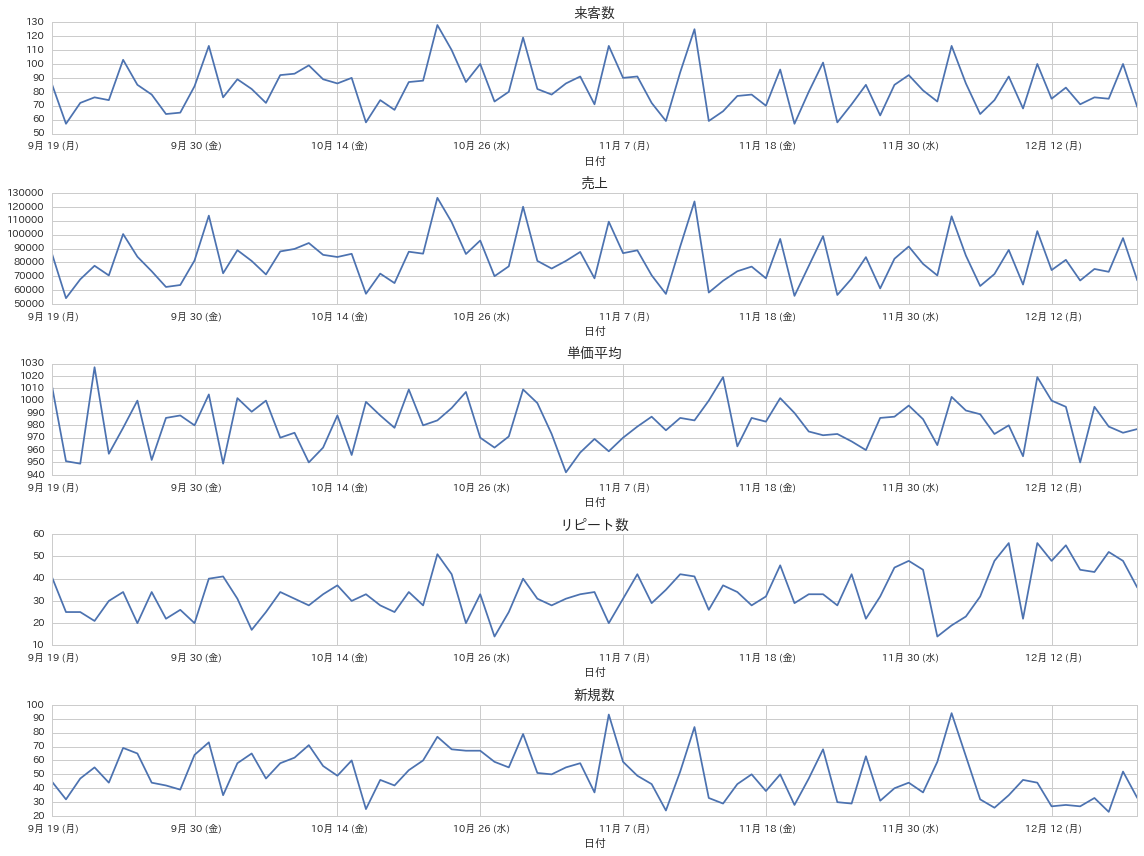

In [250]:
#1. 時系列における売上の推移はどうなっているか
#rowdata['売上'].plot(legend=True, figsize=(16, 4))
graph_num = 5
fig, axes = plt.subplots(nrows=graph_num, ncols=1, figsize=(16,12),  squeeze=False) #squeezeはsubplotsのおまじない

for i, col in enumerate(rowdata):
    rowdata[col].plot(ax=axes[i,0])
    axes[i,0].set_title(col, fontsize=14, fontweight='bold')
    i+=1
    if i == graph_num:
        break
plt.tight_layout() #スペース調整

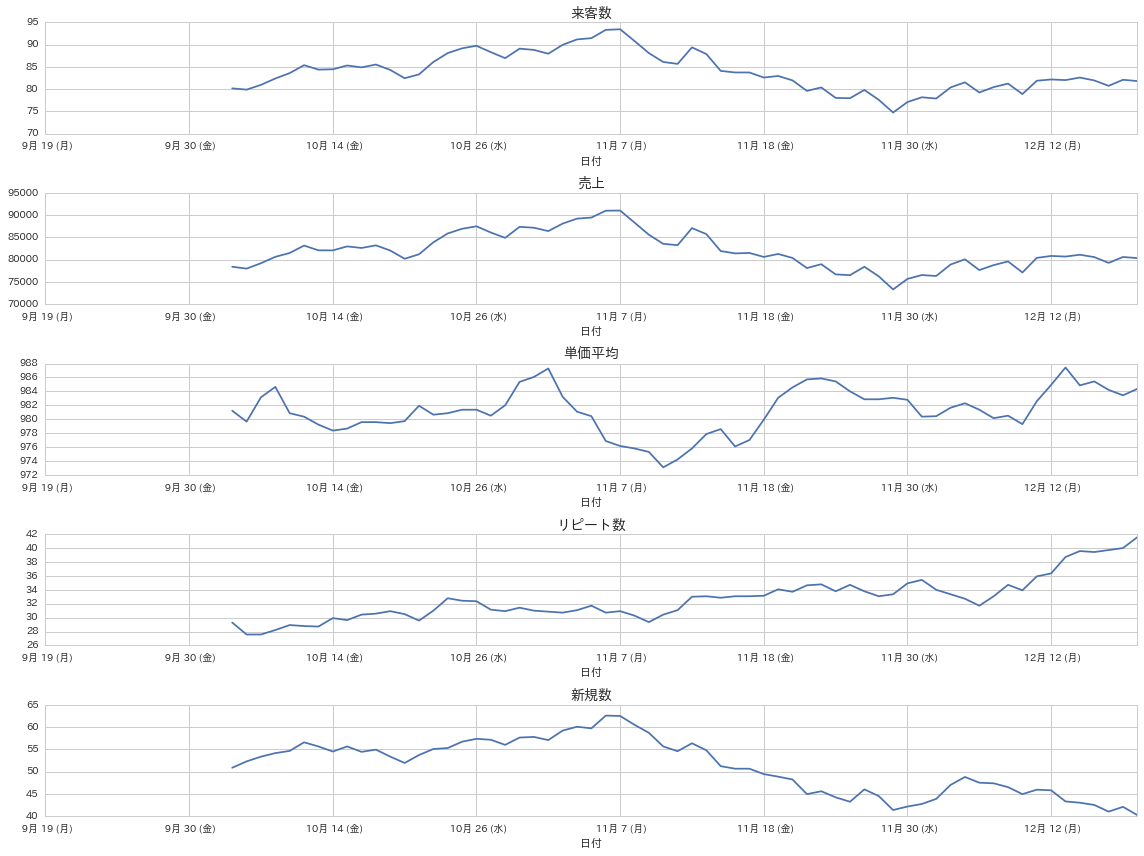

In [234]:
#よくわからないので移動平均的で出す。
rowdata_rolling = rowdata.rolling(window=14, min_periods=14).mean() #8日の移動平均

graph_num = 5
fig, axes = plt.subplots(nrows=graph_num, ncols=1, figsize=(16,12),  squeeze=False) #squeezeはsubplotsのおまじない

for i, col in enumerate(rowdata_rolling):
    rowdata_rolling[col].plot(ax=axes[i,0])
    axes[i,0].set_title(col, fontsize=14, fontweight='bold')
    i+=1
    if i == graph_num:
        break
plt.tight_layout() #スペース調整

## 新規とリピーターの割合推移

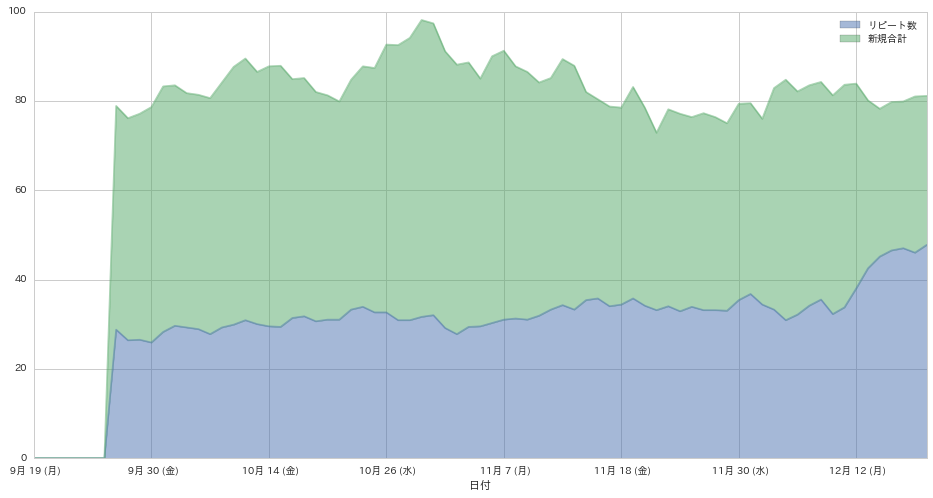

In [145]:
rowdata_rolling.loc[:,['リピート数','新規合計']].plot(
    legend=True, figsize=(16, 8), y=['リピート数','新規合計']
          , kind='area', stacked=True, alpha=0.5
)

- リピーター数は伸びている
- 新規は10月22日のTVCMで大きく増えたが少し右肩下がり
- リピーター数が伸びているので新規の落ち込みをカバーしている。全体では減ってない

## リピーターと曜日の相関

In [ ]:
#Group by で分析
week_group = rowdata[['リピート数','新規数']].groupby(rowdata['曜日'])
#week_group.mean()
week_group.mean().plot(legend=True, figsize=(16, 4), kind="bar", stacked=True)

#リピート数のweekごとの平均
#week_group['リピート数 の SUM'].mean()

#week0の数値 
#week_group.get_group(0)

#Pivot Table で分析 / aggfunc='mean' , columns='リピート数 の SUM'
rowdata.pivot_table(index="曜日",aggfunc='mean')

# 2. 天候による売上の相関関係はどうなっているか


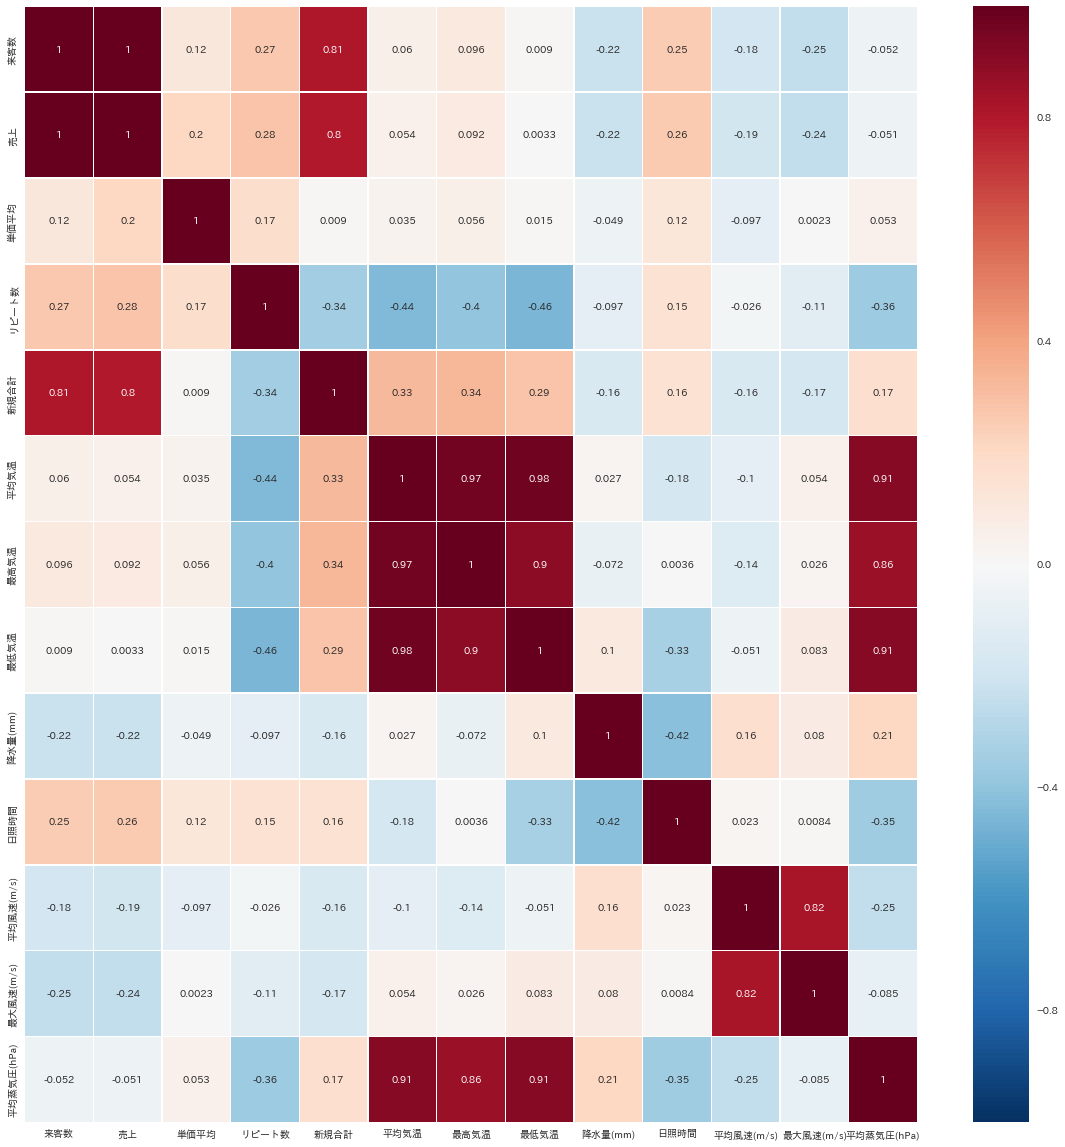

In [153]:
#とりあえず変数すべてで相関のヒートマップを見てみよう
fig, ax = plt.subplots(figsize=(20,20)) #Sizeを定義する
sns.heatmap(rowdata.corr() ,annot=True, linewidths=.5, ax=ax)

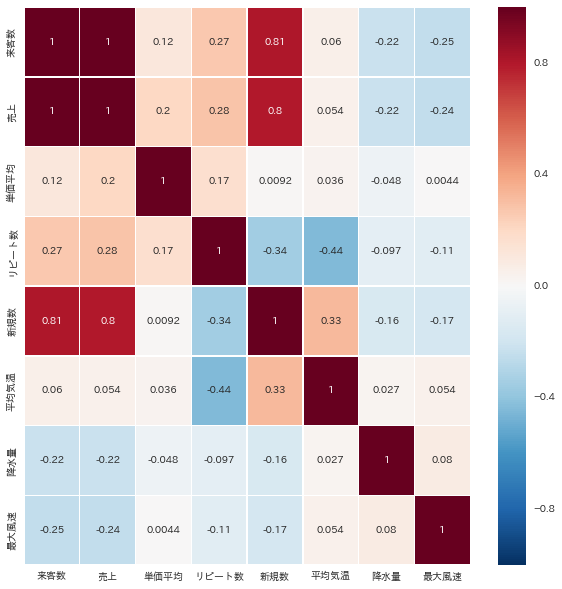

In [240]:
#よくわからないので相関がないところを削除していく。
fig, ax = plt.subplots(figsize=(10,10)) #Sizeを定義する
data = rowdata.drop(['最高気温','最低気温','日照時間', '平均風速', '蒸気圧(hPa)'], axis=1)
sns.heatmap(data.corr() ,annot=True, linewidths=.5, ax=ax)

- リピート数と単価平均に相関が見られそう
- 平均気温とリピート数に負の相関があるかも。逆に新規には正の相関？
- 雨と来店数はあんまり関係なさそう
- 風はすべての数値にほとんど関係ない
- 来客数は新規の数で決まることが多そう


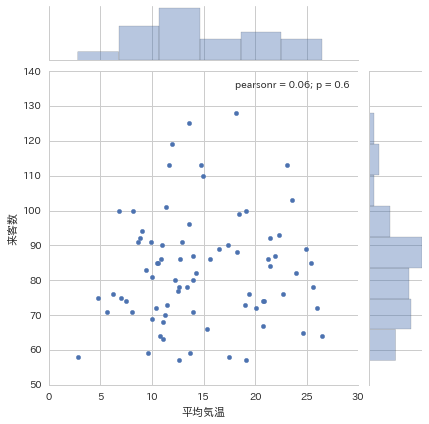

In [243]:
#気温と売上の相関を詳しく見てみる　=> 来客数 の SUMと平均気温(℃)
sns.jointplot('平均気温', '来客数', data=rowdata, kind="scatter")
#rowdata.sort_values(by='来客数', ascending=True)


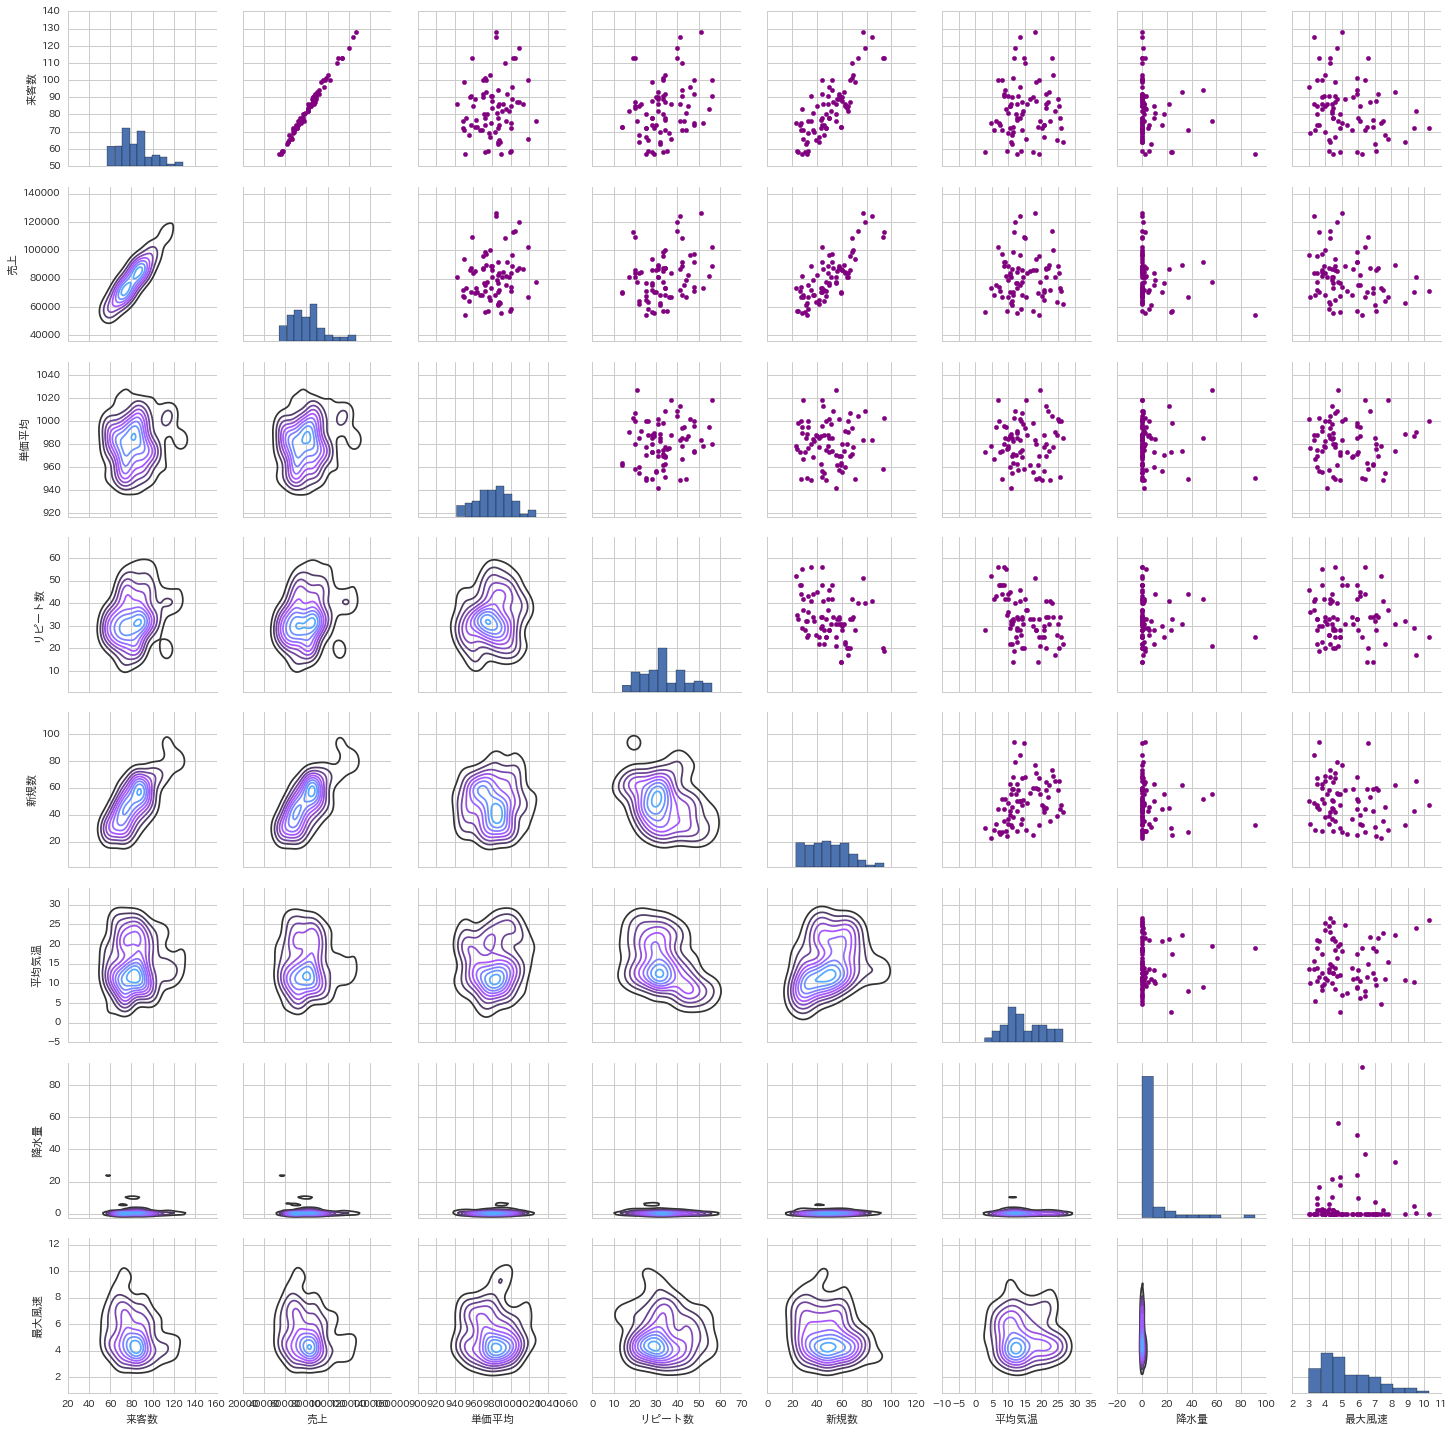

In [244]:
#散布図を書く
#sns.pairplot(data) #これだと散布図だけなので、PairGridする。
returns_fig = sns.PairGrid(data)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=10)

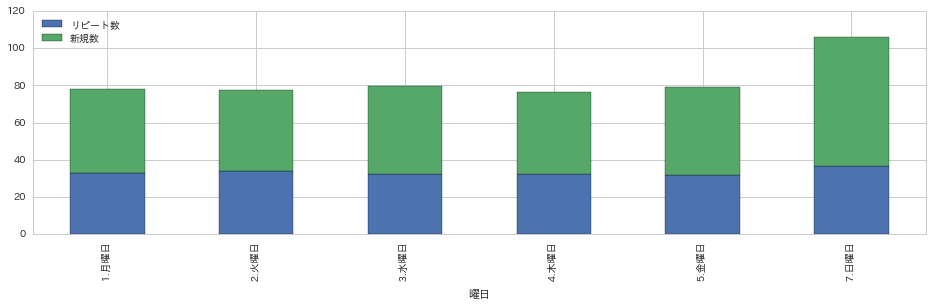

,リピート数,単価平均,売上,平均気温,平均風速,新規数,日照時間,最低気温,最大風速,最高気温,来客数,蒸気圧(hPa),降水量
曜日,,,,,,,,,,,,,
1.月曜日,32.928571,987.000000,76667.857143,15.185714,2.242857,45.285714,3.707143,12.192857,4.885714,18.650000,78.214286,14.042857,4.642857
2.火曜日,34.166667,984.750000,75904.166667,15.650000,2.325000,43.500000,3.908333,12.125000,5.325000,20.058333,77.666667,14.866667,9.625000
3.水曜日,32.416667,971.416667,77220.833333,15.008333,2.758333,47.416667,2.316667,12.066667,5.891667,18.366667,79.833333,13.516667,3.666667
4.木曜日,32.307692,984.692308,75207.692308,14.623077,2.730769,44.307692,4.869231,11.030769,5.646154,19.161538,76.615385,12.315385,7.153846
5.金曜日,31.692308,973.000000,76330.769231,13.607692,2.653846,47.230769,5.430769,9.992308,5.461538,17.500000,78.923077,10.869231,6.615385
7.日曜日,36.769231,985.153846,104880.769231,15.046154,2.161538,69.230769,5.430769,11.153846,4.630769,19.676923,106.000000,13.284615,3.500000
